# **TASK 6 | Data Science Internship**
# PREDICTION USING DECISION TREES ON IRIS DATASET

# Author: Yusra Shereen

### Importing the Libraries


In [84]:
import pandas as pd, scipy, numpy as np
import sklearn.preprocessing
from matplotlib import pyplot as plt
%matplotlib inline

### Loading the iris dataset

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species'] 

In [87]:
ds_iris = pd.read_csv('/content/drive/MyDrive/Data Science Internship/iris.data', names = headernames)
ds_iris.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [88]:
print(ds_iris)

     sepal-length  sepal-width  petal-length  petal-width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


### Splitting up in feature attributes and class variable

In [89]:
x = ds_iris.iloc[:, :-1].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [90]:
y=ds_iris.iloc[:, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

## Dealing with Missing Values

In [91]:
ds_iris.isna().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
species         0
dtype: int64

As given in documentation of dataset that dataset has no missing values or no attribute that has missing values







## Normalizing values of variables 

In [92]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(x)
normalizedX = scaler.transform(x)
normalizedX

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

## **Visualizing Data**

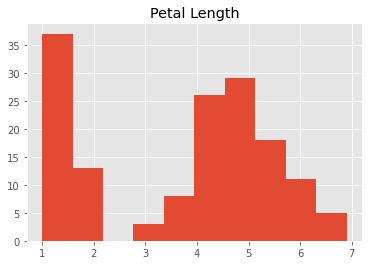

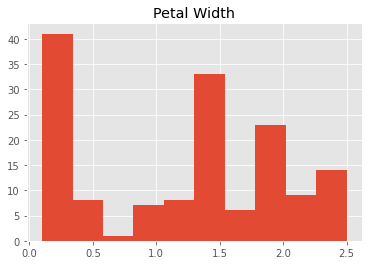

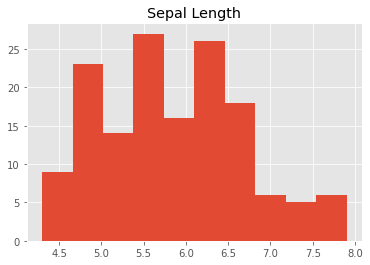

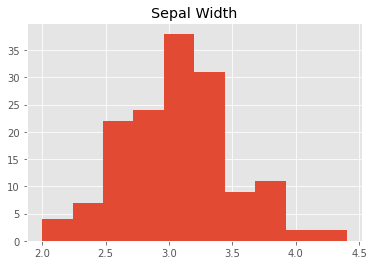

In [93]:
ds_iris['petal-length'].hist()
plt.title('Petal Length')
plt.show()
ds_iris['petal-width'].hist()
plt.title('Petal Width')
plt.show()
ds_iris['sepal-length'].hist()
plt.title('Sepal Length')
plt.show()
ds_iris['sepal-width'].hist()
plt.title('Sepal Width')
plt.show()



### **Train and Test Split**
Next, we will divide the data into train and test split. Following code will split the dataset into 60% training data and 40% of testing data

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.40)
print(X_train.shape)
print(X_test.shape)

print(X_train)
print('*************************************************************************')
print(X_test)

(90, 4)
(60, 4)
[[6.2 2.2 4.5 1.5]
 [5.  3.6 1.4 0.2]
 [4.8 3.4 1.9 0.2]
 [6.6 3.  4.4 1.4]
 [6.1 2.8 4.7 1.2]
 [5.2 4.1 1.5 0.1]
 [7.1 3.  5.9 2.1]
 [5.7 2.8 4.1 1.3]
 [5.  3.5 1.6 0.6]
 [5.2 3.5 1.5 0.2]
 [5.7 4.4 1.5 0.4]
 [6.2 2.8 4.8 1.8]
 [5.  3.4 1.5 0.2]
 [6.  2.7 5.1 1.6]
 [6.3 2.5 5.  1.9]
 [6.3 2.7 4.9 1.8]
 [5.8 2.7 4.1 1. ]
 [6.3 3.4 5.6 2.4]
 [6.7 3.1 5.6 2.4]
 [5.6 3.  4.5 1.5]
 [6.4 2.9 4.3 1.3]
 [5.1 2.5 3.  1.1]
 [6.4 2.8 5.6 2.1]
 [6.9 3.2 5.7 2.3]
 [4.4 3.2 1.3 0.2]
 [6.2 3.4 5.4 2.3]
 [5.8 4.  1.2 0.2]
 [7.4 2.8 6.1 1.9]
 [5.4 3.7 1.5 0.2]
 [5.5 2.3 4.  1.3]
 [7.7 3.  6.1 2.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [5.4 3.4 1.7 0.2]
 [4.9 3.1 1.5 0.1]
 [7.6 3.  6.6 2.1]
 [4.8 3.4 1.6 0.2]
 [7.2 3.  5.8 1.6]
 [5.1 3.5 1.4 0.2]
 [5.9 3.  4.2 1.5]
 [6.  2.2 4.  1. ]
 [5.8 2.7 5.1 1.9]
 [4.9 2.4 3.3 1. ]
 [5.4 3.9 1.7 0.4]
 [4.9 3.1 1.5 0.1]
 [6.3 3.3 6.  2.5]
 [5.9 3.2 4.8 1.8]
 [5.5 2.6 4.4 1.2]
 [6.7 2.5 5.8 1.8]
 [6.4 3.2 4.5 1.5]
 [6.3 2.3 4.4 1.3]
 [5.  2.  3.5 1

### **Decision Trees Classifier**

In [95]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [96]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [97]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


### **Visualizing Decision Tree**

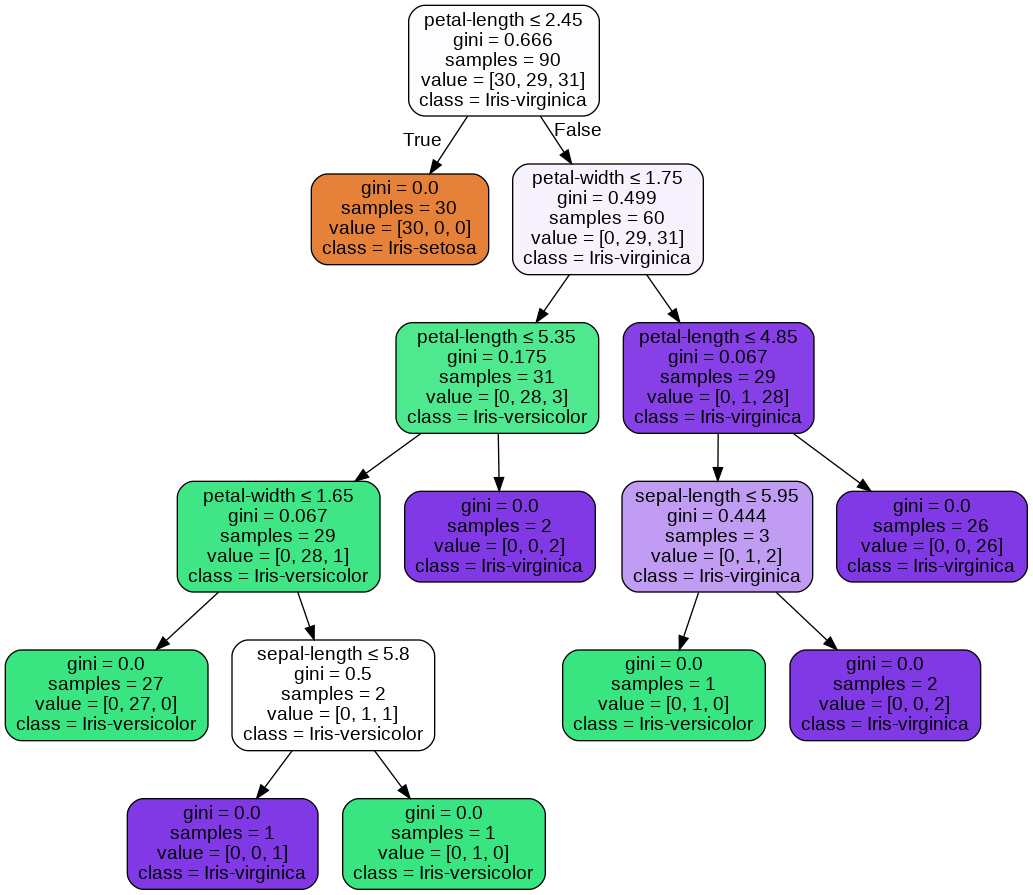

In [98]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['sepal-length','sepal-width'	,'petal-length'	,'petal-width'],
                class_names=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Iris.jpg')
Image(graph.create_png())